In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [83]:
pd.set_option('display.max_columns', None)

In [84]:
attrition_pop=pd.read_feather('/content/drive/MyDrive/DataCamp/Python Track/Sampling/attrition.feather')
print(attrition_pop.head())

   Age  Attrition     BusinessTravel  DailyRate            Department  \
0   21        0.0      Travel_Rarely        391  Research_Development   
1   19        1.0      Travel_Rarely        528                 Sales   
2   18        1.0      Travel_Rarely        230  Research_Development   
3   18        0.0      Travel_Rarely        812                 Sales   
4   18        1.0  Travel_Frequently       1306                 Sales   

   DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                15        College  Life_Sciences                    High   
1                22  Below_College      Marketing               Very_High   
2                 3       Bachelor  Life_Sciences                    High   
3                10       Bachelor        Medical               Very_High   
4                 5       Bachelor      Marketing                  Medium   

   Gender  HourlyRate JobInvolvement  JobLevel                JobRole  \
0    Male          96    

# **Calculating relative errors**


---



The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.

The most common metric for assessing accuracy is relative error. This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.


*   Generate a simple random sample from `attrition_pop` of fifty rows, setting the seed to 2022.
Calculate the mean employee `Attrition` in the sample.
Calculate the relative error between `mean_attrition_srs50` and `mean_attrition_pop` as a percentage.

*   Calculate the relative error percentage again. This time, use a simple random sample of one hundred rows of `attrition_pop`.



In [85]:
mean_attrition_pop=attrition_pop['Attrition'].mean()
std_attrition_pop=np.std(attrition_pop['Attrition'],ddof=0)

In [86]:
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50,random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct50 = 100*abs(mean_attrition_pop-mean_attrition_srs50)/mean_attrition_pop

# Print rel_error_pct50
print(rel_error_pct50)

62.78481012658227


In [87]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100,random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100*abs(mean_attrition_pop-mean_attrition_srs100)/mean_attrition_pop

# Print rel_error_pct100
print(rel_error_pct100)

6.962025316455695


As you increase the sample size, the sample mean generally gets closer to the population mean, and the relative error decreases.

# **Replicating samples**

When you calculate a point estimate such as a sample mean, the value you calculate depends on the rows that were included in the sample. That means that there is some randomness in the answer. In order to quantify the variation caused by this randomness, you can create many samples and calculate the sample mean (or another statistic) for each sample.

*   Replicate the provided code so that it runs 500 times. Assign the resulting list of sample means to mean_attritions.
*   Draw a histogram of the mean_attritions list with 16 bins.



In [88]:
# Create an empty list
mean_attritions=[]
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)

# Print out the first few entries of the list
print(mean_attritions[0:5])

[0.08333333333333333, 0.21666666666666667, 0.25, 0.13333333333333333, 0.15]


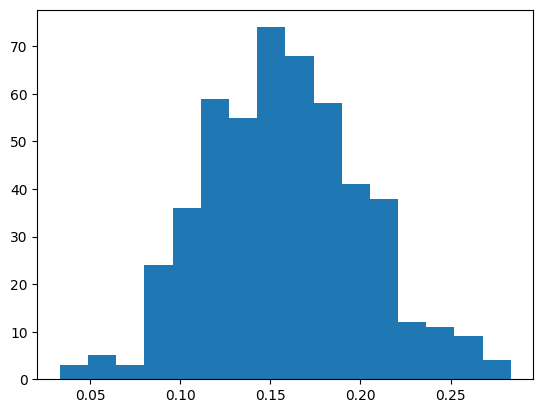

In [89]:
# Create a histogram of the 500 sample means
plt.hist(mean_attritions,bins=16)
plt.show()

# **Population & sampling distribution means**

One of the useful features of sampling distributions is that you can quantify them. Specifically, you can calculate summary statistics on them. Here, you'll look at the relationship between the mean of the sampling distribution and the population parameter's mean.

Three sampling distributions are provided. For each, the employee attrition dataset was sampled using simple random sampling, then the mean attrition was calculated. This was done 1000 times to get a sampling distribution of mean attritions. One sampling distribution used a sample size of 5 for each replicate, one used 50, and one used 500.

attrition_pop, sampling_distribution_5, sampling_distribution_50, and sampling_distribution_500 are available; numpy as np is loaded.

In [90]:
sampling_distribution_5=[]
for i in range(1000):
	sampling_distribution_5.append(
    	attrition_pop.sample(n=5)['Attrition'].mean()
	)

In [91]:
sampling_distribution_50=[]
for i in range(1000):
	sampling_distribution_50.append(
    	attrition_pop.sample(n=50)['Attrition'].mean()
	)

In [92]:
sampling_distribution_500=[]
for i in range(1000):
	sampling_distribution_500.append(
    	attrition_pop.sample(n=500)['Attrition'].mean()
	)



*   Calculate the mean of sampling_distribution_5, sampling_distribution_50, and sampling_distribution_500 (a mean of sample means).




In [93]:
# Calculate the mean of the mean attritions for each sampling distribution
mean_of_means_5 = np.mean(sampling_distribution_5)
mean_of_means_50 = np.mean(sampling_distribution_50)
mean_of_means_500 = np.mean(sampling_distribution_500)

# Print the results
print(mean_attrition_pop)
print(mean_of_means_5)
print(mean_of_means_50)
print(mean_of_means_500)

0.16122448979591836
0.15419999999999998
0.15908000000000005
0.161402


# **Population & sampling distribution variation**

You just calculated the mean of the sampling distribution and saw how it is an estimate of the corresponding population parameter. Similarly, as a result of the central limit theorem, the standard deviation of the sampling distribution has an interesting relationship with the population parameter's standard deviation and the sample size.

*   Calculate the standard deviation of sampling_distribution_5, sampling_distribution_50, and sampling_distribution_500 (a standard deviation of sample means).



In [94]:
# Calculate the std. dev. of the mean attritions for each sampling distribution
sd_of_means_5 = np.std(sampling_distribution_5,ddof=1)
sd_of_means_50 = np.std(sampling_distribution_50,ddof=1)
sd_of_means_500 = np.std(sampling_distribution_500,ddof=1)

# Print the results
print(std_attrition_pop)
print(sd_of_means_5*np.sqrt(5))
print(sd_of_means_50*np.sqrt(50))
print(sd_of_means_500*np.sqrt(500))

0.367737887204955
0.36255102157247227
0.3532739482080196
0.30548407244653286


### **The standard deviations of the sampling distribution is approximately equal to the population standard deviation divided by the square root of the sample size.**

### **And Efficiency=1/variance. So less std means better efficiency.**

---



# **Generating a bootstrap distribution**


---



The process for generating a bootstrap distribution is similar to the process for generating a sampling distribution; only the first step is different.

**To make a sampling distribution, you start with the population and sample without replacement. To make a bootstrap distribution, you start with a sample and sample that with replacement. After that, the steps are the same: calculate the summary statistic that you are interested in on that sample/resample, then replicate the process many times. In each case, you can visualize the distribution with a histogram.**

Here, `spotify_sample` is a subset of the `spotify_population` dataset. To make it easier to see how resampling works, a row index column called 'index' has been added, and only the artist name, song name, and danceability columns have been included.

In [95]:
spotify_population=pd.read_feather('/content/drive/MyDrive/DataCamp/Python Track/Sampling/spotify_2000_2020.feather')
print(spotify_population)

       acousticness                             artists  danceability  \
0           0.97200                     ['David Bauer']         0.567   
1           0.32100                      ['Etta James']         0.821   
2           0.00659                       ['Quasimoto']         0.706   
3           0.00390                     ['Millencolin']         0.368   
4           0.12200                      ['Steve Chou']         0.501   
...             ...                                 ...           ...   
41651       0.17300              ['DripReport', 'Tyga']         0.875   
41652       0.01670  ['Leon Bridges', 'Terrace Martin']         0.719   
41653       0.53800               ['Kygo', 'Oh Wonder']         0.514   
41654       0.07140       ['Cash Cash', 'Andy Grammer']         0.646   
41655       0.10900                  ['Ingrid Andress']         0.512   

       duration_ms  duration_minutes  energy  explicit  \
0         313293.0          5.221550   0.227       0.0   
1      

In [96]:
spotify_s=spotify_population[['artists','danceability','name','popularity']]
spotify_sample=spotify_s.sample(frac=.4,random_state=2022).reset_index()
print(spotify_sample)

       index                                            artists  danceability  \
0      27030  ['Dreamville', 'Bas', 'JID', 'Guapdad 4000', '...         0.642   
1      17604                      ['La Factoria', 'Eddy Lover']         0.675   
2      30694                                    ['Eric Church']         0.385   
3      25667                               ['Three Days Grace']         0.409   
4      18245                                  ['Robert DeLong']         0.538   
...      ...                                                ...           ...   
16657  24225                                   ['Dustin Lynch']         0.355   
16658   1825                                   ['T3R Elemento']         0.702   
16659   3698                                           ['COIN']         0.497   
16660   2333                                    ['Hans Zimmer']         0.286   
16661  20222                                     ['Kolohe Kai']         0.727   

                           

There are 4 steps of creating Bootstrap:


1.   Generate a single bootstrap resample from `spotify_sample` with same sample size of `spotify_sample`.
2.   Calculate the mean of the danceability column of `spotify_sample` using numpy.
3.   Replicate the expression provided 1000 times.
4.   Create a bootstrap distribution by drawing a histogram of `mean_danceability_1000`.





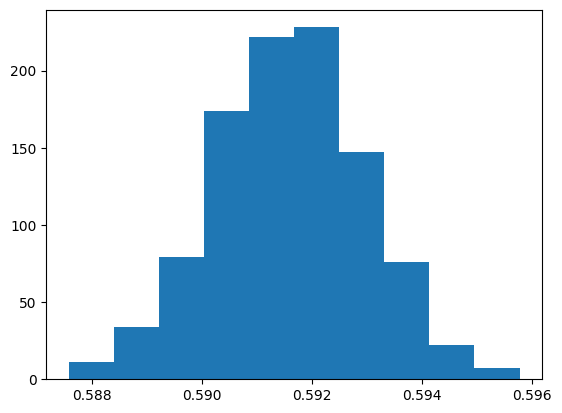

In [97]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)

# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

Bootstrap distribution statistics can be used to estimate population parameters. But can you always rely on them to give an accurate estimate of an unknown population parameter?

Should the mean and the standard deviation of the bootstrap distribution both be used to estimate the corresponding values of the population?


No, the standard deviation of the bootstrap distribution divided by the square root of the sample size will tend to be near the sample standard deviation, which may not necessarily be very close to the population standard deviation.

# **Sampling distribution vs. bootstrap distribution**


---


The sampling distribution and bootstrap distribution are closely linked. In situations where you can repeatedly sample from a population (these occasions are rare), it's helpful to generate both the sampling distribution and the bootstrap distribution, one after the other, to see how they are related.

Here, the statistic you are interested in is the mean `popularity` score of the songs.

`spotify_population` (the whole dataset) and `spotify_sample_500` (500 randomly sampled rows from `spotify_population`) are available; `pandas` and `numpy` are loaded with their usual aliases.


*   Generate a sampling distribution of 2000 replicates.
Sample 500 rows of the population without replacement and calculate the mean `popularity`.
*   Generate a bootstrap distribution of 2000 replicates.
Sample 500 rows of the sample with replacement and calculate the mean `popularity`.



In [98]:
spotify_sample_500=spotify_population.sample(n=500,random_state=2022)
print(len(spotify_sample_500))

500


In [107]:
sampling_distribution = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    sampling_distribution.append(
    	# Sample 500 rows and calculate the mean popularity
    	np.mean(spotify_population.sample(n=500)['popularity'])
  )

# Print the sampling distribution results
print(sampling_distribution[0:5])

[55.408, 55.166, 54.274, 55.062, 54.318]


In [108]:
bootstrap_distribution = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    bootstrap_distribution.append(
    	# Resample 500 rows and calculate the mean popularity
    	np.mean(spotify_sample_500.sample(frac=1,replace=True)['popularity'])
    )

# Print the bootstrap distribution results
print(bootstrap_distribution[0:5])

[55.402, 55.352, 54.644, 55.63, 55.478]


# **Compare sampling and bootstrap means**


---


To make calculation easier, distributions similar to those calculated from the previous exercise have been included, this time using a sample size of 5000.

Calculate the mean popularity in 4 ways:
1.   Population: from `spotify_population`, take the mean of popularity.
2.   Sample: from `spotify_sample`, take the mean of popularity.
3.   Sampling distribution: from `sampling_distribution`, take its mean.
4.   Bootstrap distribution: from `bootstrap_distribution`, take its mean.





In [101]:
# Calculate the population mean popularity
pop_mean = np.mean(spotify_population['popularity'])

# Calculate the original sample mean popularity
samp_mean = np.mean(spotify_sample['popularity'])

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(sampling_distribution)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(bootstrap_distribution)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[54.837142308430955, 54.851938542791984, 54.835085, 55.25188800000001]


# **Compare sampling and bootstrap standard deviations**


---


In the same way that you looked at how the sampling distribution and bootstrap distribution could be used to estimate the population mean, you'll now take a look at how they can be used to estimate variation, or more specifically, the standard deviation, in the population.

Calculate the standard deviation of popularity in 4 ways.


1.   Population: from `spotify_population`, take the standard deviation of popularity.

2.   Original sample: from `spotify_sample`, take the standard deviation of popularity.

3.   Sampling distribution: from `sampling_distribution`, take its standard deviation and multiply by the square root of the sample size (500).

4.   Bootstrap distribution: from `bootstrap_distribution`, take its standard deviation and multiply by the square root of the sample size.





In [104]:
# Calculate the population std dev popularity
pop_sd = np.std(spotify_population['popularity'],ddof=0)

# Calculate the original sample std dev popularity
samp_sd = np.std(spotify_sample['popularity'],ddof=1)

# Calculate the sampling dist'n estimate of std dev popularity
samp_distn_sd = np.std(sampling_distribution,ddof=1)*np.sqrt(500)

# Calculate the bootstrap dist'n estimate of std dev popularity
boot_distn_sd = np.std(bootstrap_distribution,ddof=1)*np.sqrt(len(spotify_sample_500))

# Print the standard deviations
print([pop_sd, samp_sd, samp_distn_sd, boot_distn_sd])

[10.880065274257536, 10.858043514379123, 10.831244726676827, 10.485127976440783]


The formula for estimating the standard deviation from the sampling distribution and bootstrap distribution is as follows:

**Sampling Distribution:**

The standard deviation of the sampling distribution, also known as the standard error.
Standard Deviation (Sampling Distribution) = Standard Deviation (Sample Statistic) / sqrt(n)
where n is the sample size, and Standard Deviation (Sample Statistic) is the standard deviation of the sample statistic (e.g., mean, proportion) obtained from multiple random samples of the same size from a population.

**Bootstrap Distribution:**

Standard Deviation (Bootstrap Distribution) = Standard Deviation (Bootstrap Sample Statistic) / sqrt(B)
where B is the number of bootstrap samples, and Standard Deviation (Bootstrap Sample Statistic) is the standard deviation of the sample statistic obtained from multiple bootstrap samples.

Both formulas involve dividing the standard deviation of the sample statistic by the square root of the sample size (n or B). This scaling adjustment accounts for the impact of sample size on the variability of the sample statistic and provides an estimate of the standard deviation of the population parameter.

# **Calculating confidence intervals**


---


You have learned about two methods for calculating confidence intervals: the quantile method and the standard error method. The standard error method involves using the inverse cumulative distribution function (inverse CDF) of the normal distribution to calculate confidence intervals. In this exercise, you'll perform these two methods on the Spotify data.


*   Generate a 95% confidence interval using the quantile method on the bootstrap distribution, setting the 0.025 quantile as `lower_quant` and the 0.975 quantile as `upper_quant`.

*   Generate a 95% confidence interval using the standard error method from the `bootstrap distribution`.Calculate `point_estimate` as the mean of `bootstrap_distribution`, and `standard_error` as the standard deviation of bootstrap_distribution.
Calculate `lower_se` as the 0.025 quantile of an inv. CDF from a normal distribution with mean `point_estimate` and standard deviation `standard_error`.
Calculate `upper_se` as the 0.975 quantile of that same inv. CDF.




In [105]:
# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(bootstrap_distribution,0.025)
upper_quant = np.quantile(bootstrap_distribution,0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

(54.3157, 56.18005)


In [106]:
# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(bootstrap_distribution)
standard_error = np.std(bootstrap_distribution,ddof=1)

# Find the lower limit of the confidence interval
lower_se =  norm.ppf(0.025, loc=point_estimate, scale=standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(0.975, loc=point_estimate, scale=standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))

(54.33284289878196, 56.170933101218054)


The standard error method for calculating the confidence interval assumes that the bootstrap distribution is normal. This assumption should hold if the sample size and number of replicates are sufficiently large.